In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'US'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without US' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
#country_df['Removed'] = country_df.Confirmed.shift(periods = 14)
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>5000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Important_countries = ['India', 'World', 'World without US',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Last_day_df.index}

In [11]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83884,2020-04-23,4636,77983,82619,1265,0.056113,0.015080
France,159460,2020-04-23,21889,42762,64651,94809,0.338572,0.594563
Germany,153129,2020-04-23,5575,103300,108875,44254,0.051206,0.288998
India,23077,2020-04-23,721,5012,5733,17344,0.125763,0.751571
Iran,87026,2020-04-23,5481,64843,70324,16702,0.077939,0.191920
Italy,189973,2020-04-23,25549,57576,83125,106848,0.307356,0.562438
"Korea, South",10708,2020-04-23,240,8501,8741,1967,0.027457,0.183694
Spain,213024,2020-04-23,22157,89250,111407,101617,0.198883,0.477021
US,869170,2020-04-23,49954,80203,130157,739013,0.383798,0.850251


In [27]:
Last_day_df[Last_day_df.Deaths>1000]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Belgium,42797,2020-04-23,6490,9800,16290,26507,0.398404,0.619366
Brazil,50036,2020-04-23,3331,26573,29904,20132,0.111390,0.402350
Canada,43285,2020-04-23,2240,14761,17001,26284,0.131757,0.607231
China,83884,2020-04-23,4636,77983,82619,1265,0.056113,0.015080
France,159460,2020-04-23,21889,42762,64651,94809,0.338572,0.594563
Germany,153129,2020-04-23,5575,103300,108875,44254,0.051206,0.288998
Iran,87026,2020-04-23,5481,64843,70324,16702,0.077939,0.191920
Italy,189973,2020-04-23,25549,57576,83125,106848,0.307356,0.562438
Mexico,11633,2020-04-23,1069,2627,3696,7937,0.289232,0.682283


In [12]:
Doubling_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Confirmed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr/2])
    Doubling_period[cun] = [rp]
pd.DataFrame(Doubling_period)[Important_countries].transpose()

,0
Iran,24
"Korea, South",51
France,16
United Kingdom,14
China,74
Spain,22
Italy,26
Germany,23
US,15
World without US,18


In [13]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 14
for cun in Last_day_df.index:
    df = DF_Dict[cun]
    
    #DF_Dict[cun]['Removed'] = DF_Dict[cun].Confirmed.shift(periods = 14)
    DF_Dict[cun]['Active'] = DF_Dict[cun].Confirmed - DF_Dict[cun].Removed
    DF_Dict[cun]['Mortality'] = DF_Dict[cun].Deaths/DF_Dict[cun].Removed
    DF_Dict[cun]['Part_Active'] = DF_Dict[cun].Active/DF_Dict[cun].Confirmed

    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [14]:
DC = DF_Dict['India'].columns
DF_Dict['India']#.tail(10)

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-25,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-26,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-27,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-28,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-29,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-30,1,0,0,0,1,NaN,1.000000,1,0,0,0,NaN


In [15]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83884,2020-04-23,4636,77983,82619,1265,0.056113,0.015080
France,159460,2020-04-23,21889,42762,64651,94809,0.338572,0.594563
Germany,153129,2020-04-23,5575,103300,108875,44254,0.051206,0.288998
India,23077,2020-04-23,721,5012,5733,17344,0.125763,0.751571
Iran,87026,2020-04-23,5481,64843,70324,16702,0.077939,0.191920
Italy,189973,2020-04-23,25549,57576,83125,106848,0.307356,0.562438
"Korea, South",10708,2020-04-23,240,8501,8741,1967,0.027457,0.183694
Spain,213024,2020-04-23,22157,89250,111407,101617,0.198883,0.477021
US,869170,2020-04-23,49954,80203,130157,739013,0.383798,0.850251


In [16]:
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'pink', 'Iran': 'red', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}

def plotwithx(x, cols, DF_Dict = DF_Dict):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (14, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in DC:
                plt.xscale('log')
                #plt.xlim(5*10**3, 5*10**6)

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
                #plt.ylim(10**1, 10**7)
            for cun in Important_countries:
                df = DF_Dict[cun]#.tail(50)
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                         df[col],
                         label = cun,
                         #linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-',
                         color = colors[cun], 
                         alpha = 0.6
                        )
            plt.legend(Important_countries)
            plt.plot()


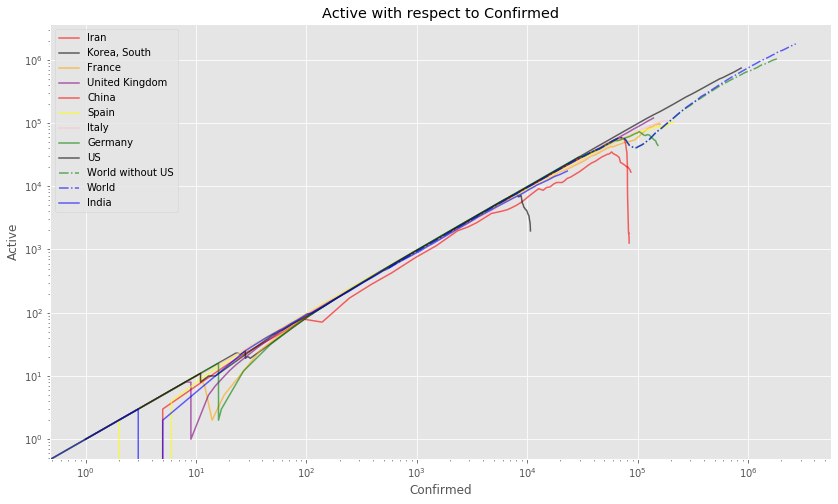

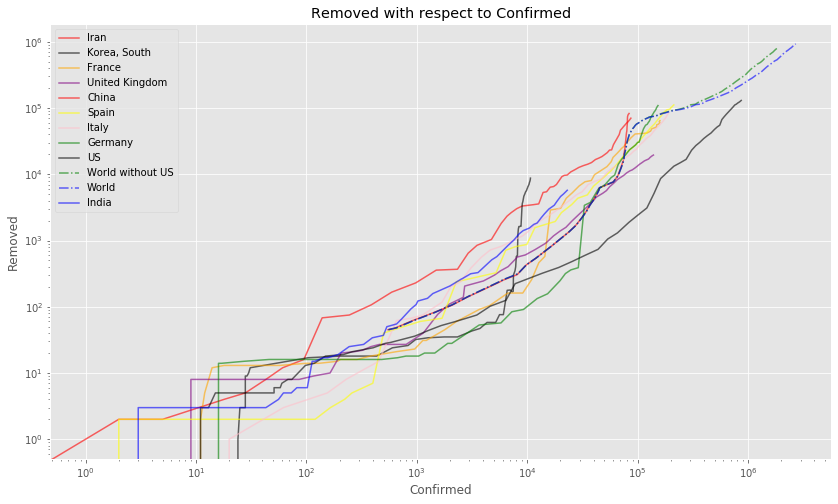

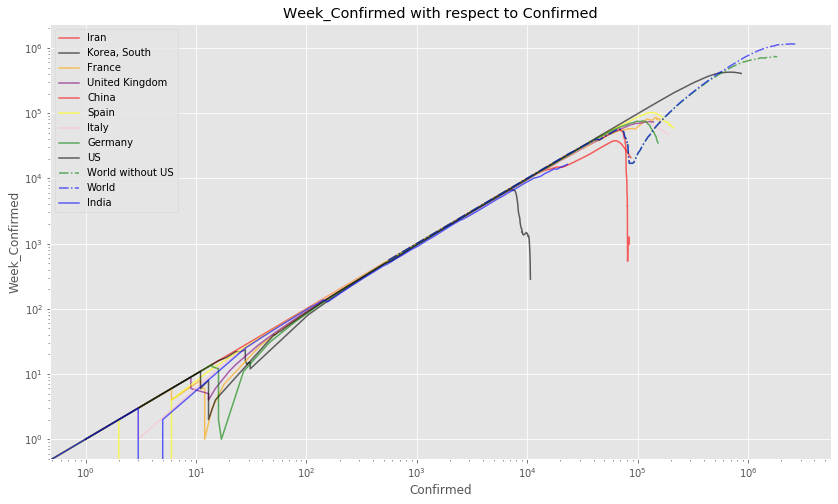

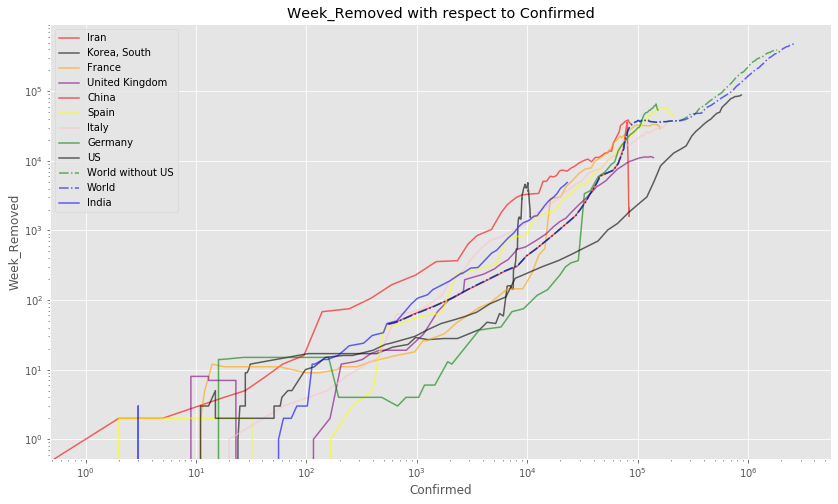

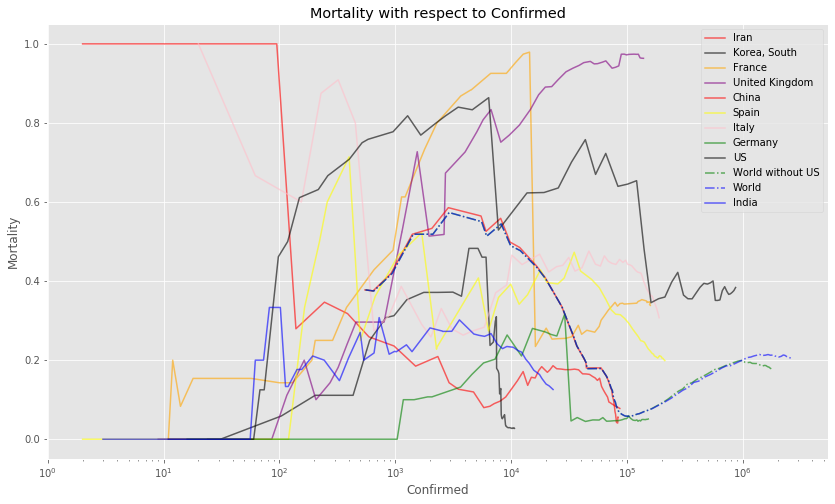

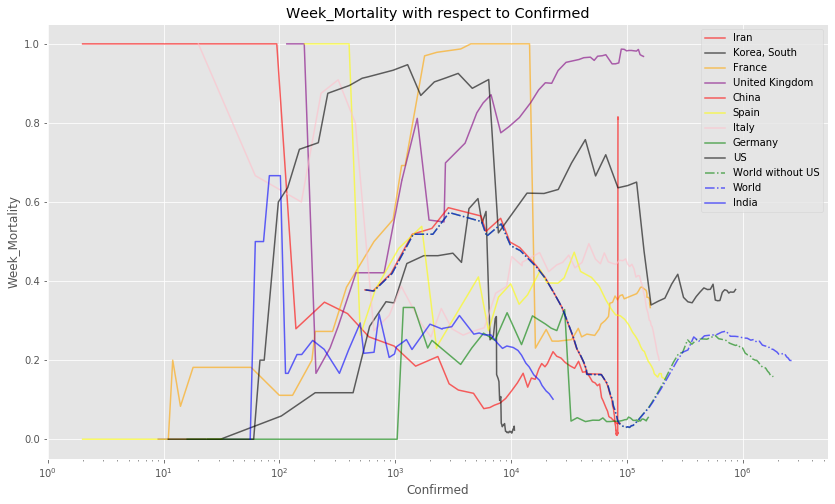

In [17]:
plotwithx('Confirmed', ['Active', 'Removed', 'Week_Confirmed', 'Week_Removed', 'Mortality', 'Week_Mortality'])

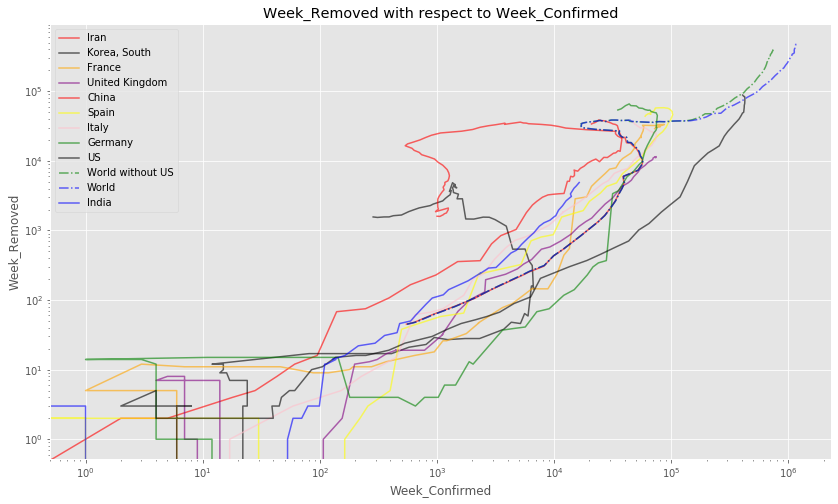

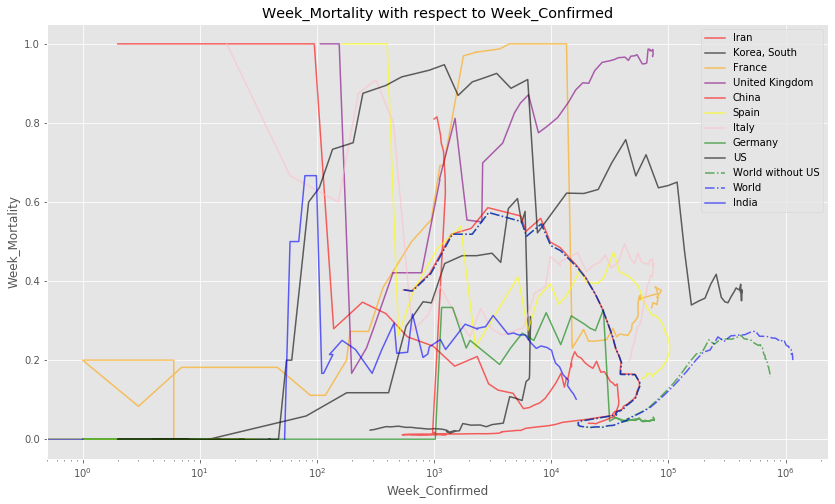

In [18]:
plotwithx('Week_Confirmed', ['Week_Removed', 'Week_Mortality'])

In [19]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Norway,7401,2020-04-23,194,32,226,7175,0.858407,0.969464
Panama,5166,2020-04-23,146,271,417,4749,0.350120,0.919280
Singapore,11178,2020-04-23,12,924,936,10242,0.012821,0.916264
Russia,62773,2020-04-23,555,4891,5446,57327,0.101910,0.913243
Portugal,22353,2020-04-23,820,1201,2021,20332,0.405740,0.909587
Ukraine,7170,2020-04-23,187,504,691,6479,0.270622,0.903626
Qatar,7764,2020-04-23,10,750,760,7004,0.013158,0.902112
Netherlands,35921,2020-04-23,4192,101,4293,31628,0.976473,0.880488
Belarus,8022,2020-04-23,60,938,998,7024,0.060120,0.875592


In [20]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Singapore,11178,2020-04-23,12,924,936,10242,0.012821,0.916264
Qatar,7764,2020-04-23,10,750,760,7004,0.013158,0.902112
Australia,6661,2020-04-23,75,4124,4199,2462,0.017861,0.369614
Malaysia,5603,2020-04-23,95,3542,3637,1966,0.026120,0.350883
"Korea, South",10708,2020-04-23,240,8501,8741,1967,0.027457,0.183694
Chile,11812,2020-04-23,168,5804,5972,5840,0.028131,0.494412
United Arab Emirates,8756,2020-04-23,56,1637,1693,7063,0.033077,0.806647
Israel,14803,2020-04-23,192,5611,5803,9000,0.033086,0.607985
Austria,15002,2020-04-23,522,11694,12216,2786,0.042731,0.185709


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


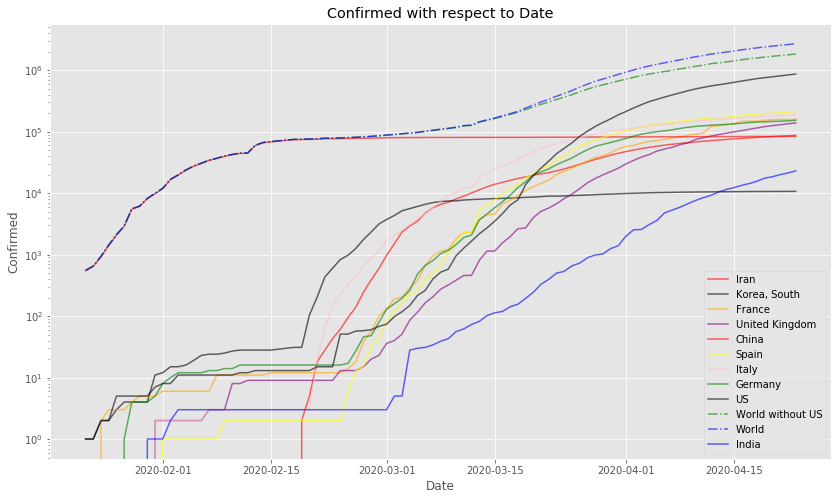

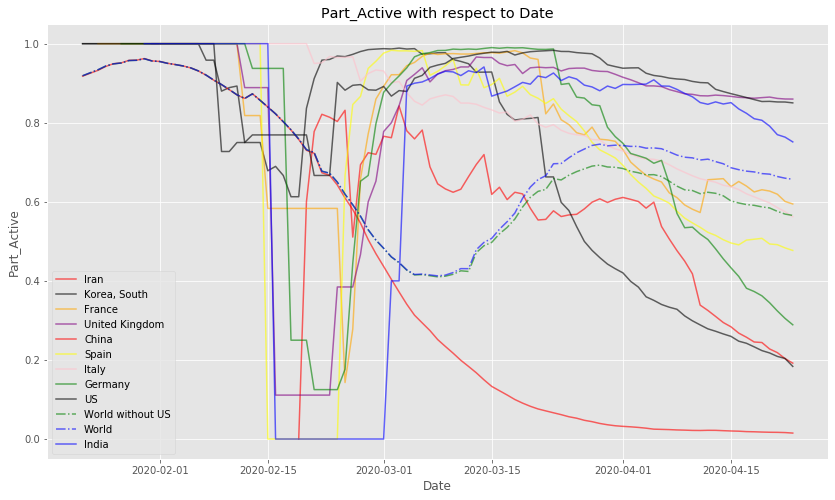

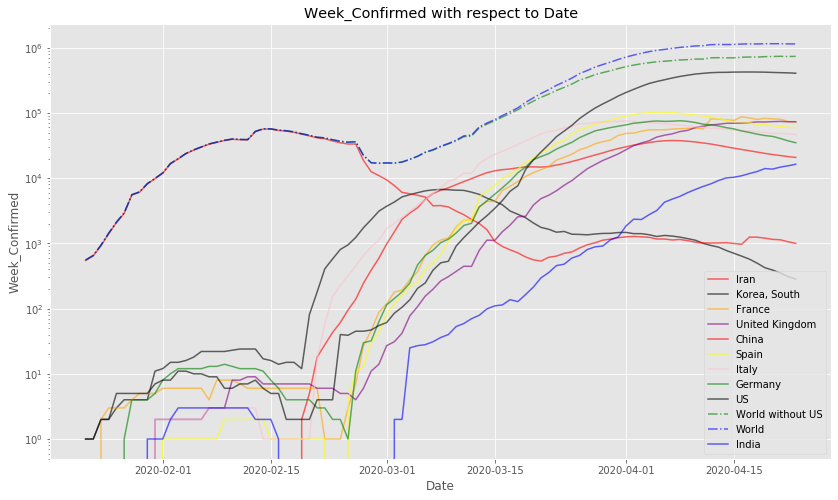

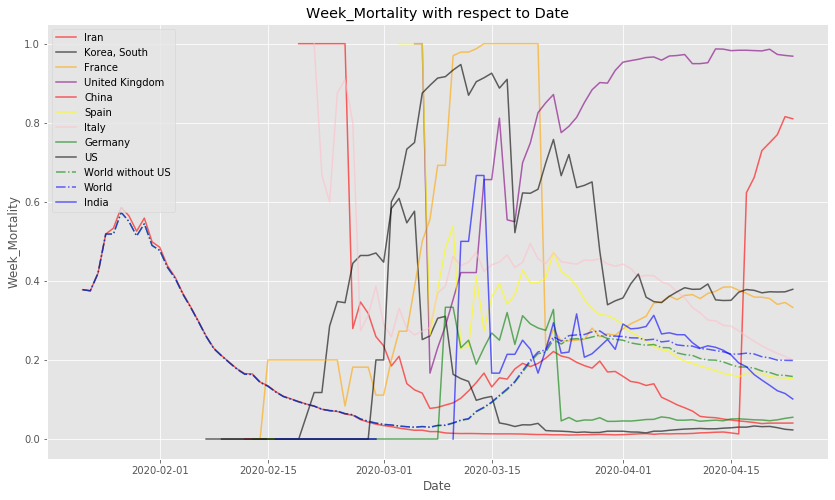

In [21]:
plotwithx('Date', ['Confirmed', 'Part_Active', 'Week_Confirmed', 'Week_Mortality'])

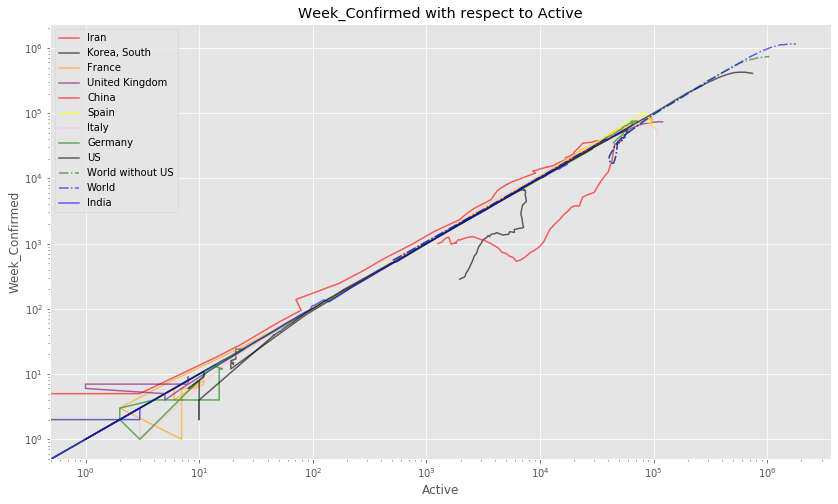

In [22]:
plotwithx('Active', ['Week_Confirmed'])

In [23]:
Removing_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Removed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr])
    Removing_period[cun] = rp
Removing_period

{'Australia': 25,
 'Austria': 18,
 'Belarus': 16,
 'Belgium': 21,
 'Brazil': 8,
 'Canada': 17,
 'Chile': 15,
 'China': 18,
 'Czechia': 27,
 'Denmark': 14,
 'Dominican Republic': 26,
 'Ecuador': 26,
 'France': 21,
 'Germany': 16,
 'India': 16,
 'Indonesia': 23,
 'Iran': 12,
 'Ireland': 11,
 'Israel': 23,
 'Italy': 28,
 'Japan': 26,
 'Korea, South': 34,
 'Malaysia': 19,
 'Mexico': 13,
 'Netherlands': 32,
 'Norway': 45,
 'Pakistan': 20,
 'Panama': 30,
 'Peru': 11,
 'Philippines': 26,
 'Poland': 24,
 'Portugal': 32,
 'Qatar': 24,
 'Romania': 21,
 'Russia': 18,
 'Saudi Arabia': 20,
 'Serbia': 23,
 'Singapore': 23,
 'Spain': 22,
 'Sweden': 29,
 'Switzerland': 17,
 'Turkey': 20,
 'US': 26,
 'Ukraine': 23,
 'United Arab Emirates': 19,
 'United Kingdom': 26,
 'World': 23,
 'World without US': 21}

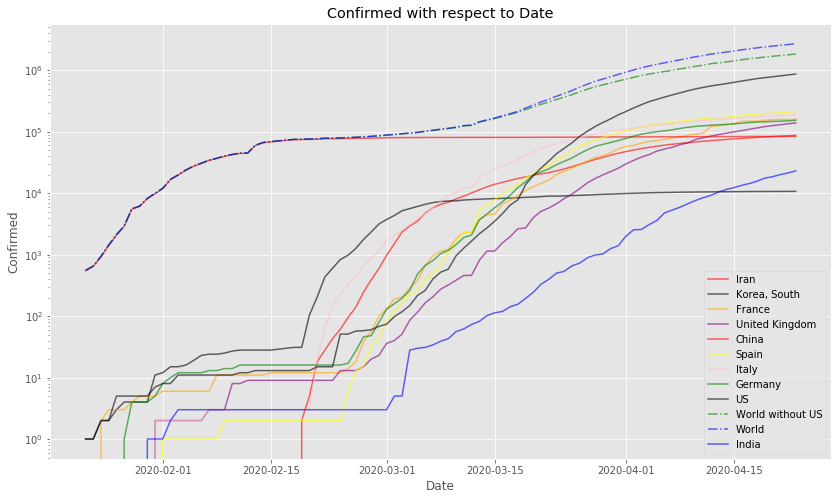

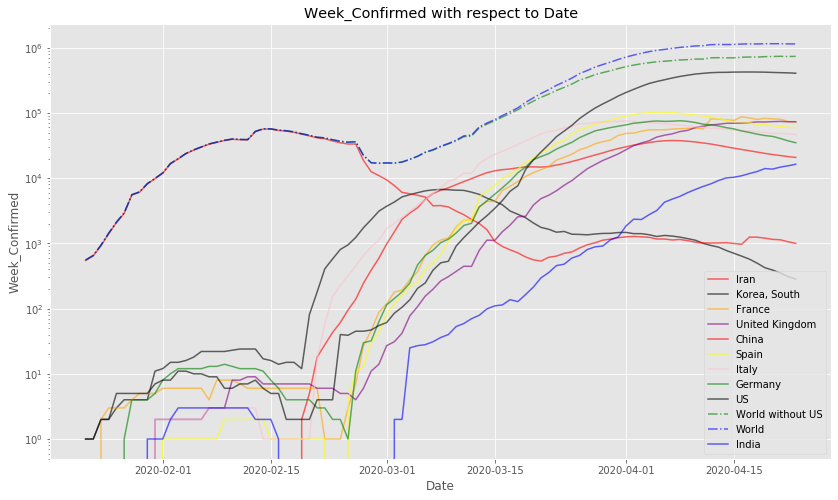

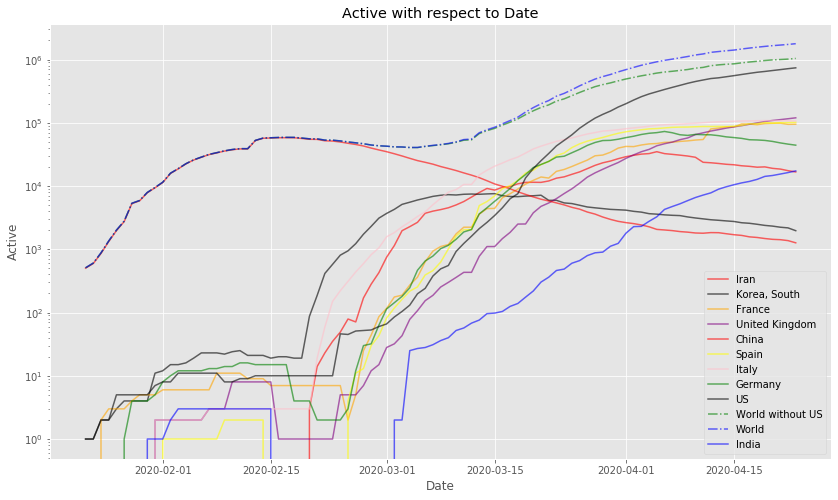

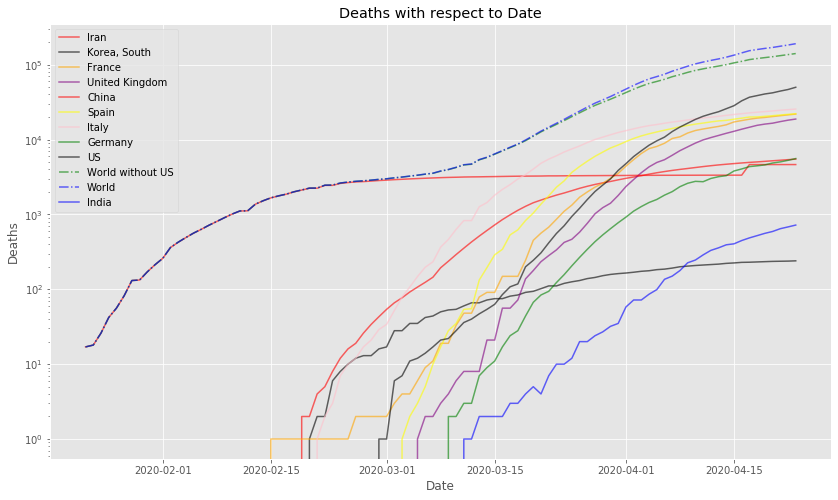

In [24]:
plotwithx('Date', ['Confirmed', 'Week_Confirmed', 'Active', 'Deaths'])

In [25]:
DF_Dict['France']

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,2,0,0,0,2,NaN,1.000000,2,0,0,0,NaN
2020-01-25,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-26,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-27,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-28,4,0,0,0,4,NaN,1.000000,4,0,0,0,NaN
2020-01-29,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
2020-01-30,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
